In [1]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,models

In [7]:
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
x_train =x_train/255.0
x_test=x_test/255.0

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")

encoder=models.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Conv2D(32,(3,3),activation='relu',strides=2,padding='same'),
    layers.Conv2D(64,(2,2),activation="relu",strides=2,padding='same'),
    layers.Flatten(),
    layers.Dense(64,activation='relu')
])


decoder=models.Sequential([
   layers.InputLayer(input_shape=(64,)),
   layers.Dense(7*7*64,activation='relu'),
   layers.Reshape((7,7,64)),
   layers.Conv2DTranspose(64,(3,3),strides=2,padding='same',activation='relu'),
   layers.Conv2DTranspose(32,(3,3),strides=2,padding='same',activation='relu'),
   layers.Conv2D(1,(3,3),padding='same',activation='sigmoid')
])


autoencoder=models.Sequential([encoder,decoder])
autoencoder.summary()


x_train shape:(60000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 64)             │       209,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,865 (1.79 MB)

 Trainable params: 468,865 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,344 (817.75 KB)

 Trainable params: 209,344 (817.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
decoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=10,batch_size=128,validation_data=(x_test,x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 126s 260ms/step - loss: 0.2714 - val_loss: 0.0849
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 241ms/step - loss: 0.0828 - val_loss: 0.0761
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 232ms/step - loss: 0.0760 - val_loss: 0.0729
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 223ms/step - loss: 0.0731 - val_loss: 0.0713
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 222ms/step - loss: 0.0715 - val_loss: 0.0703
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 230ms/step - loss: 0.0704 - val_loss: 0.0694
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 225ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 220ms/step - loss: 0.0692 - val_loss: 0.0685
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 221ms/step - loss: 0.0689 - val_loss: 0.0683
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 220ms/step - loss: 0.0685 - val_loss: 0.0679


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


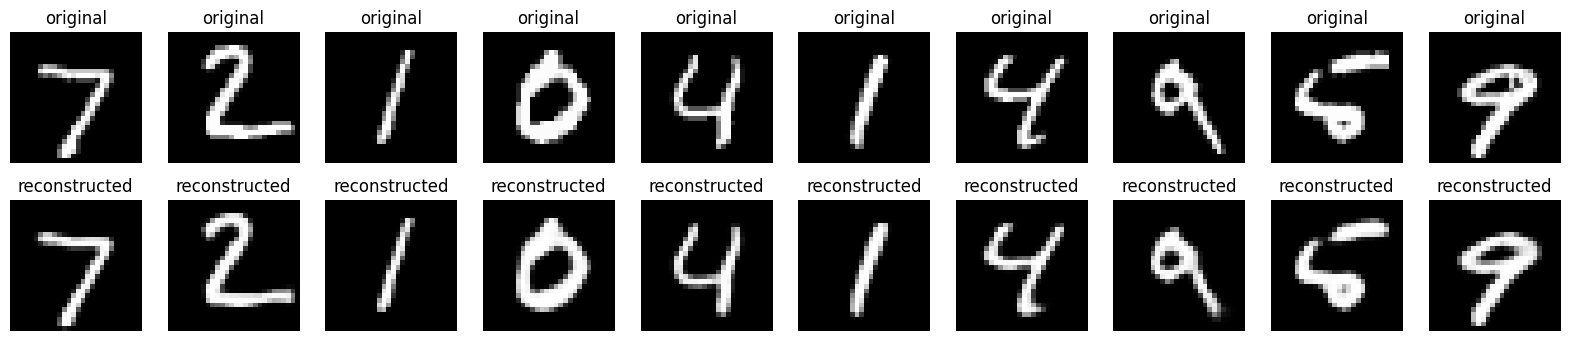

In [12]:
decoded_image=autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  plt.gray()
  ax.axis('off')
  plt.title("original")


  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_image[i].reshape(28,28),cmap="gray")
  plt.gray()
  ax.axis('off')
  plt.title("reconstructed")
plt.show()